World Balanced Portfolio
----------------------------------------

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    loader = Loader()
    loader.get('VWO', 0.1 * 10e-3)
    loader.get('IVV', 0.03 * 10e-3)
    loader.get('SPDW', 0.04 * 10e-3)
    loader.get('BND', 0.04 * 10e-3)
    loader.get('BNDX', 0.08 * 10e-3)
    loader.get('GLD', 0.4 * 10e-3)
    loader.save('/app/docs/tutorial/portfolio.bin')

loader = Loader.load('/app/docs/tutorial/portfolio.bin')
market = loader.get_market()

In [2]:
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import FixedEvacuator
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0]

100%|██████████| 1854/1854 [00:07<00:00, 235.14it/s]


                            tickers  yearly total return  sharpe ratio  \
0  [VWO, IVV, SPDW, BND, BNDX, GLD]             1.054614      0.473587   

   max draw down  max draw down span  
0       0.835713                 343  
              return       std  sharpe ratio  draw down
2014-12-31  0.031375  0.043400      0.262100   0.958447
2015-12-31 -0.019331  0.065211     -0.603138   0.921606
2016-12-31  0.056019  0.065825      0.547191   0.903616
2017-12-31  0.115878  0.032462      2.953542   0.979668
2018-12-31 -0.046339  0.065283     -1.016168   0.903808
2019-12-31  0.149196  0.049656      2.601829   0.924003
2020-12-31  0.088330  0.139044      0.491425   0.835713
2021-12-31  0.040225  0.061613      0.328263   0.973472


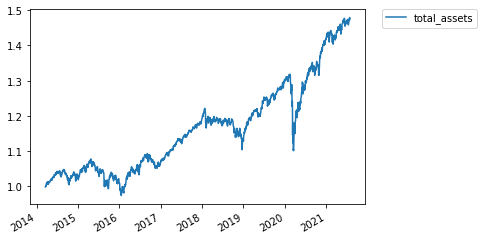

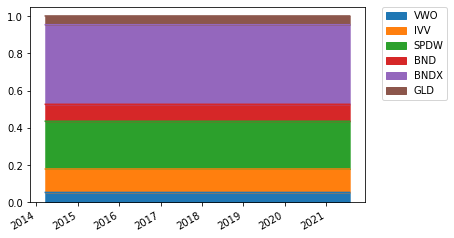

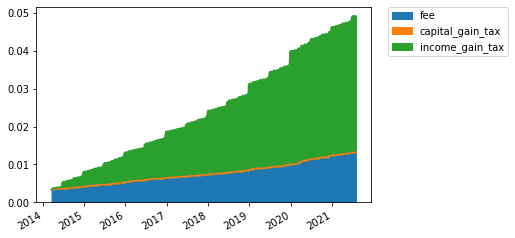

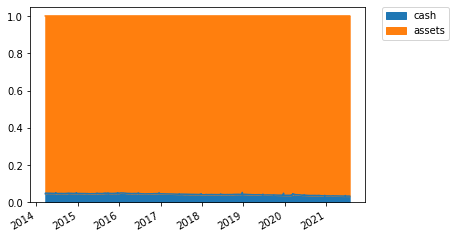

In [3]:
['VWO', 'IVV', 'SPDW', 'BND', 'BNDX', 'GLD']
optimizer = RiskParityOptimizer(risk_target=[0.85 * 0.175, 0.85 * 0.223, 0.85 * 0.603, 0.10 *0.25 , 0.10 * 0.75,  0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
